In [1]:
import numpy as np
import matplotlib.pyplot as plt
import noisereduce as nr
from pydub import AudioSegment
from scipy.io import wavfile

# For playing audio in the notebook (if you're using one)
from IPython.display import Audio

c:\Users\mp\miniconda3\envs\perkit_audio\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Load MP3 file
audio = AudioSegment.from_mp3("F:\perkit_audio\Chennai 23rd Sep 24\DI-1_Jannet_41Yrs_A_Working_Nuclear Family_HBC Lapser_(Lapser to detergent)_23th Sep_English Audio_Pr Jannet_Chennai_11AM_1042.mp3")

# Export as WAV
audio.export("temp.wav", format="wav")

# Read the exported WAV file
sr, y = wavfile.read("temp.wav")

#Convert to float32 type
y = y.astype(np.float32)

# If stereo, convert to mono by averaging channels
if len(y.shape) > 1:
    y = np.mean(y, axis=1)

print(f"Shape of the audio signal: {y.shape}")
print(f"Sample rate: {sr}")

Shape of the audio signal: (417249792,)
Sample rate: 44100


In [8]:
# Perform noise reduction
reduced_noise = nr.reduce_noise(y=y, sr=sr)

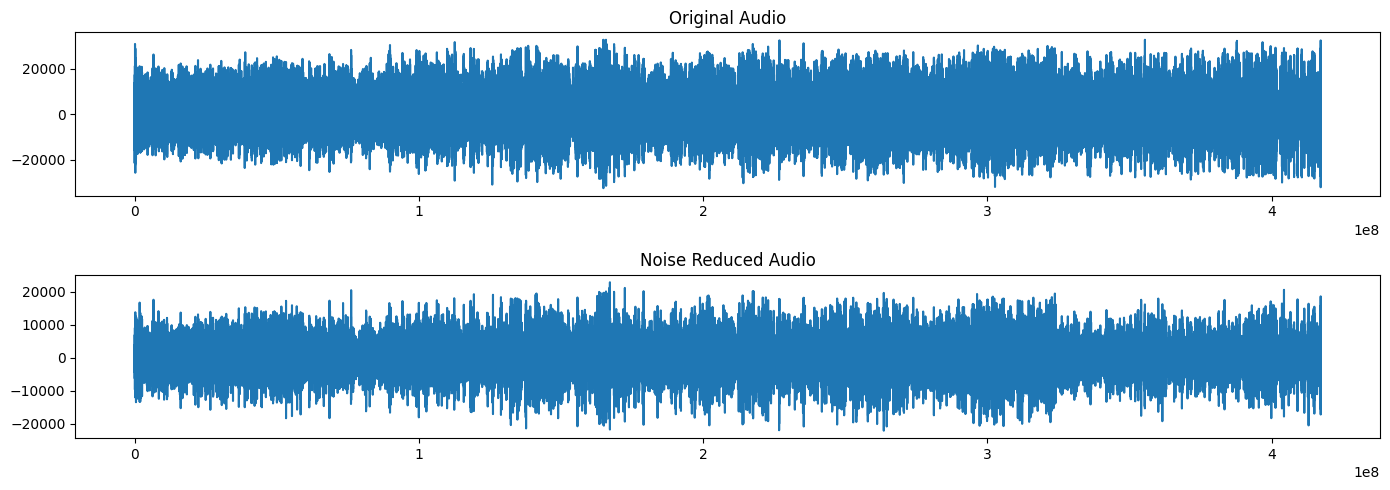

Original Audio:


In [9]:
# Plot the waveforms
plt.figure(figsize=(14, 5))
plt.subplot(211)
plt.title("Original Audio")
plt.plot(y)
plt.subplot(212)
plt.title("Noise Reduced Audio")
plt.plot(reduced_noise)
plt.tight_layout()
plt.show()

# Play the audio
print("Original Audio:")
display(Audio(y, rate=sr))
print("Noise Reduced Audio:")
display(Audio(reduced_noise, rate=sr))

# Save the noise-reduced audio
wavfile.write("noise_reduced_output.wav", sr, (reduced_noise * 32767).astype(np.int16))